<a href="https://colab.research.google.com/github/Sri-iim/Group4_BIDM_Project/blob/main/Trial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd

# Load the data
data = pd.read_csv('air_pollution_data.csv')

# Display the first few rows
print(data.head())

# Get summary statistics
print(data.describe())

# Check data types and missing values
print(data.info())


        city       date  aqi       co    no    no2     o3    so2   pm2.5  \
0  Ahmedabad  1/12/2020    5  1682.28  7.71  54.84   0.73  21.70  120.95   
1     Aizawl  1/12/2020    3   447.27  0.04  23.99   4.34   4.53   20.23   
2  Amaravati  1/12/2020    5  1295.09  0.11  18.17  12.88   6.02  171.07   
3   Amritsar  1/12/2020    5  2456.67  0.00  40.78  32.54   8.94  296.55   
4  Bengaluru  1/12/2020    5   480.65  0.00   7.80  75.10   3.93   83.53   

     pm10    nh3  
0  154.53  27.36  
1   26.40  13.68  
2  194.68   6.02  
3  345.40  32.93  
4   97.38   1.55  
                aqi            co           no           no2            o3  \
count  23504.000000  23504.000000  23504.00000  23504.000000  23504.000000   
mean       3.920354   1113.224543      6.00554     25.044104     35.059777   
std        1.415490   1401.770372     24.50272     25.839242     31.901760   
min        1.000000    173.570000      0.00000      0.310000      0.000000   
25%        3.000000    447.270000      

In [2]:
#Convert 'date' column to datetime objects
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

#Checking for missing values
print(data.isnull().sum())

#Handle missing values (example: fill with mean) - Replace 'column_name' with the actual column
#data['column_name'].fillna(data['column_name'].mean(), inplace=True)


ValueError: time data "13-01-2021" doesn't match format "%d/%m/%Y", at position 359. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [3]:
# Convert 'date' column to datetime objects
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y', errors='coerce')
#The format is changed to match the date format. errors='coerce' will handle invalid parsing by setting them to NaT.
#You can later decide how to handle NaT values

# Checking for missing values
print(data.isnull().sum())

# Handle missing values (example: fill with mean) - Replace 'column_name' with the actual column
# data['column_name'].fillna(data['column_name'].mean(), inplace=True)

city        0
date     9334
aqi         0
co          0
no          0
no2         0
o3          0
so2         0
pm2.5       0
pm10        0
nh3         0
dtype: int64


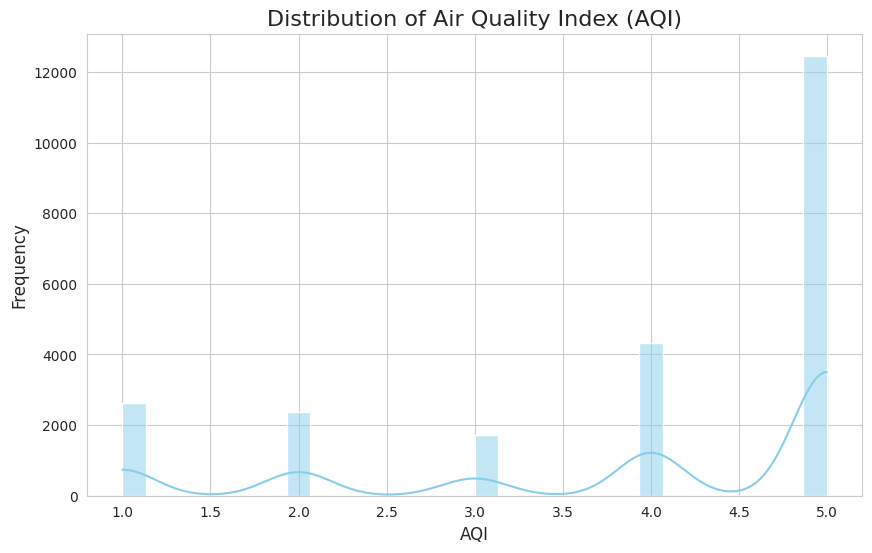

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing style for plots
sns.set_style("whitegrid")

# Distribution of AQI values
plt.figure(figsize=(10, 6))
sns.histplot(data['aqi'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Air Quality Index (AQI)', fontsize=16)
plt.xlabel('AQI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


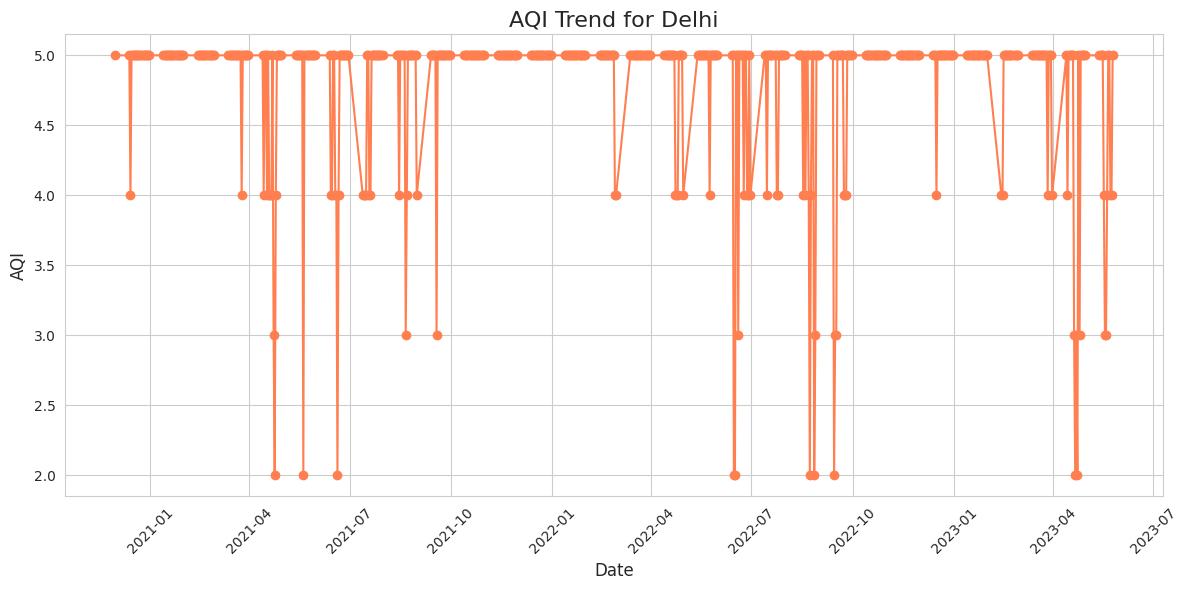

In [5]:
# Example: Time series of AQI for Delhi
city = 'Delhi'
city_data = data[data['city'] == city].copy()  # Create a copy to avoid SettingWithCopyWarning
city_data.sort_values(by='date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(city_data['date'], city_data['aqi'], marker='o', linestyle='-', color='coral')
plt.title(f'AQI Trend for {city}', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


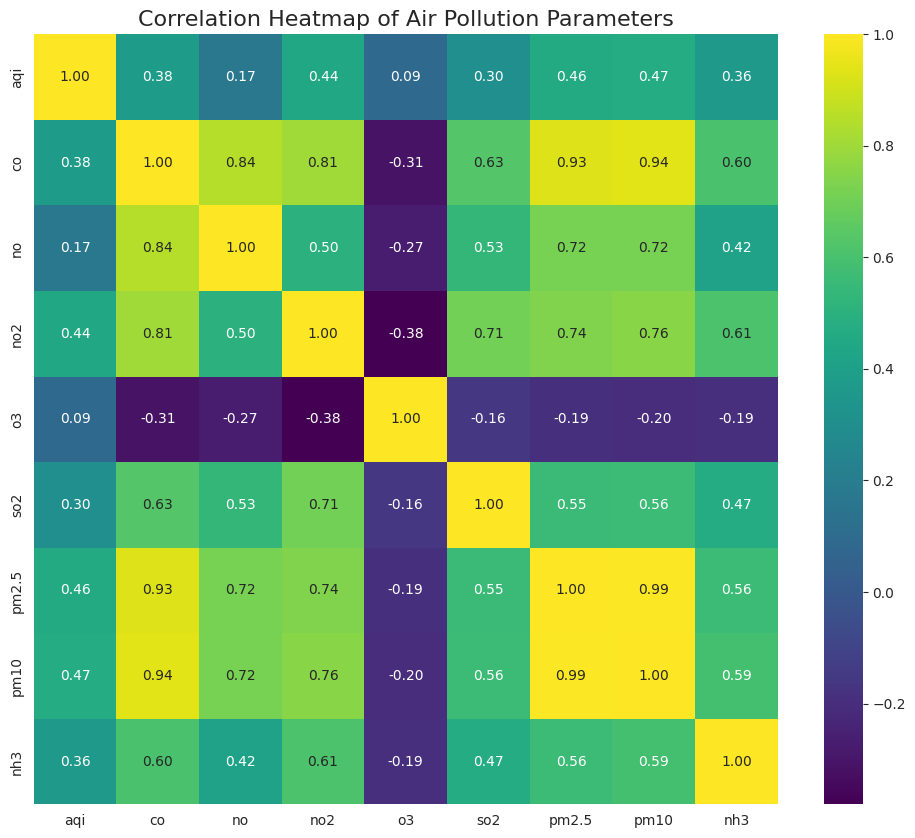

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Air Pollution Parameters', fontsize=16)
plt.show()




city
Delhi                 4.808628
Jorapokhar            4.806416
Amritsar              4.782080
Patna                 4.756637
Lucknow               4.698009
Gurugram              4.682522
Kolkata               4.613938
Chandigarh            4.358407
Jaipur                4.336283
Brajrajnagar          4.284292
Ahmedabad             4.115044
Guwahati              4.096239
Talcher               4.037611
Mumbai                4.012168
Bhopal                3.919248
Hyderabad             3.809735
Chennai               3.768805
Amaravati             3.702434
Visakhapatnam         3.674779
Shillong              3.384956
Thiruvananthapuram    3.195796
Bengaluru             2.856195
Ernakulam             2.823009
Kochi                 2.823009
Coimbatore            2.799779
Aizawl                2.783186
Name: aqi, dtype: float64


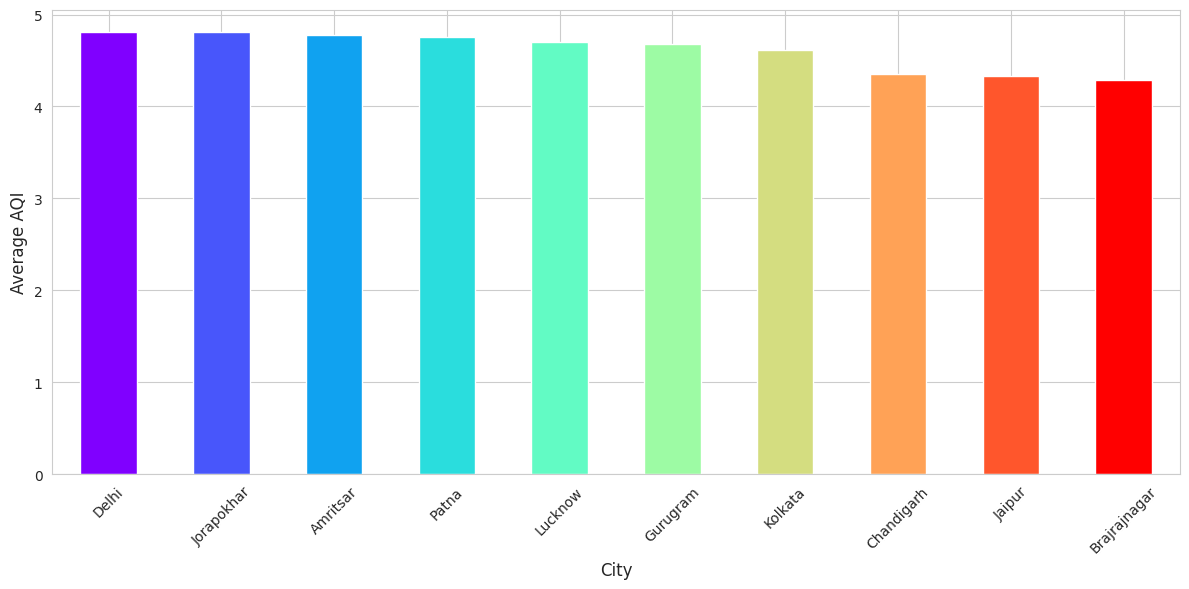

In [67]:
import numpy as np

# Average AQI by city
city_aqi = data.groupby('city')['aqi'].mean().sort_values(ascending=False)
print(city_aqi)

# Bar plot of average AQI by city (top 10)
plt.figure(figsize=(12, 6))
city_aqi.head(10).plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(city_aqi.head(10))))) # Use a colormap with np.linspace to generate a list of colorsplt.title('Top 10 Cities with Highest Average AQI', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


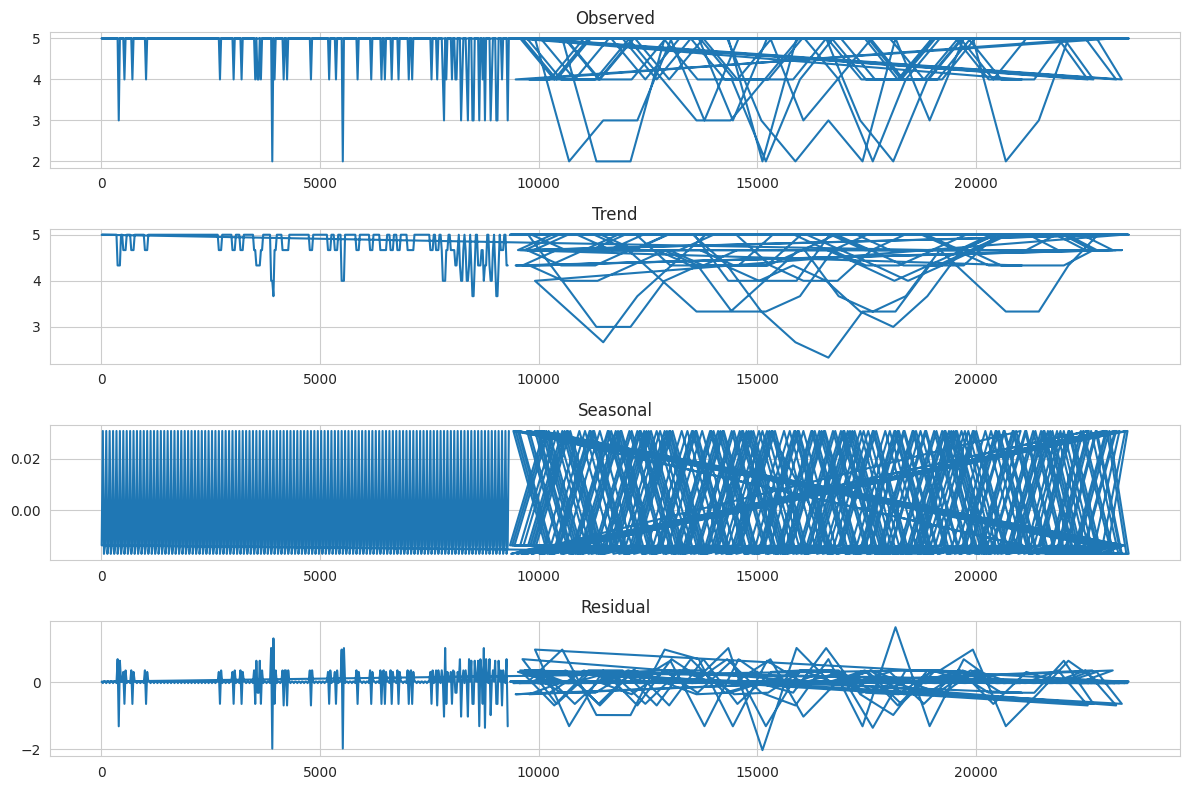

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(city_data['aqi'], model='additive', period=3) #Period is the number of data points in a season

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import json

def prepare_data(csv_file):
    """Reads the CSV, calculates average AQI per city, and prepares data for the frontend."""
    df = pd.read_csv(csv_file)
    # Ensure 'date' column is correctly formatted for parsing
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

    # Calculate average AQI per city
    city_aqi = df.groupby('city')['aqi'].mean().reset_index()

    # City coordinates (manually add these)
    city_coordinates = {
        'Ahmedabad': {'lat': 23.0225, 'lng': 72.5714},
        'Aizawl': {'lat': 23.7271, 'lng': 92.7176},
        'Amaravati': {'lat': 16.5062, 'lng': 80.6483},
        'Amritsar': {'lat': 31.6340, 'lng': 74.8723},
        'Bengaluru': {'lat': 12.9716, 'lng': 77.5946},
        'Bhopal': {'lat': 23.2599, 'lng': 77.4126},
        'Brajrajnagar': {'lat': 21.8167, 'lng': 83.9000},
        'Chandigarh': {'lat': 30.7333, 'lng': 76.7794},
        'Chennai': {'lat': 13.0827, 'lng': 80.2707},
        'Coimbatore': {'lat': 11.0168, 'lng': 76.9558},
        'Delhi': {'lat': 28.6139, 'lng': 77.2090},
        'Ernakulam': {'lat': 9.9816, 'lng': 76.3083},
        'Gurugram': {'lat': 28.4595, 'lng': 77.0266},
        'Guwahati': {'lat': 26.1445, 'lng': 91.7362},
        'Hyderabad': {'lat': 17.3850, 'lng': 78.4867},
        'Jaipur': {'lat': 26.9124, 'lng': 75.7873},
        'Jorapokhar': {'lat': 23.7167, 'lng': 86.1667},
        'Kochi': {'lat': 9.9312, 'lng': 76.2673},
        'Kolkata': {'lat': 22.5726, 'lng': 88.3639},
        'Lucknow': {'lat': 26.8467, 'lng': 80.9462},
        'Mumbai': {'lat': 19.0760, 'lng': 72.8777},
        'Patna': {'lat': 25.5941, 'lng': 85.1376},
        'Shillong': {'lat': 25.5789, 'lng': 91.8933},
        'Talcher': {'lat': 20.9500, 'lng': 85.2333},
        'Thiruvananthapuram': {'lat': 8.5241, 'lng': 76.9366},
        'Visakhapatnam': {'lat': 17.6868, 'lng': 83.2185}
    }

    # Merge coordinates with AQI data
    data = []
    for index, row in city_aqi.iterrows():
        city = row['city']
        if city in city_coordinates:
            data.append({
                'city': city,
                'lat': city_coordinates[city]['lat'],
                'lng': city_coordinates[city]['lng'],
                'aqi': row['aqi']
            })
    return data

#Example usage
data = prepare_data('air_pollution_data.csv')
print(data)


ValueError: time data "13-01-2021" doesn't match format "%d/%m/%Y", at position 359. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [11]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

NameError: name 'df' is not defined

In [14]:
import pandas as pd

# ... (Previous code)

def prepare_data(csv_file):
    """Reads the CSV, calculates average AQI per city, and prepares data for the frontend."""
import pandas as pd

# ... (Previous code)

def prepare_data(csv_file):
    """Reads the CSV, calculates average AQI per city, and prepares data for the frontend."""
    df = pd.read_csv(csv_file)
    # Ensure 'date' column is correctly formatted for parsing
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [15]:

import json


    # Calculate average AQI per city
    city_aqi = df.groupby('city')['aqi'].mean().reset_index()

    # City coordinates (manually add these)
    city_coordinates = {
        'Ahmedabad': {'lat': 23.0225, 'lng': 72.5714},
        'Aizawl': {'lat': 23.7271, 'lng': 92.7176},
        'Amaravati': {'lat': 16.5062, 'lng': 80.6483},
        'Amritsar': {'lat': 31.6340, 'lng': 74.8723},
        'Bengaluru': {'lat': 12.9716, 'lng': 77.5946},
        'Bhopal': {'lat': 23.2599, 'lng': 77.4126},
        'Brajrajnagar': {'lat': 21.8167, 'lng': 83.9000},
        'Chandigarh': {'lat': 30.7333, 'lng': 76.7794},
        'Chennai': {'lat': 13.0827, 'lng': 80.2707},
        'Coimbatore': {'lat': 11.0168, 'lng': 76.9558},
        'Delhi': {'lat': 28.6139, 'lng': 77.2090},
        'Ernakulam': {'lat': 9.9816, 'lng': 76.3083},
        'Gurugram': {'lat': 28.4595, 'lng': 77.0266},
        'Guwahati': {'lat': 26.1445, 'lng': 91.7362},
        'Hyderabad': {'lat': 17.3850, 'lng': 78.4867},
        'Jaipur': {'lat': 26.9124, 'lng': 75.7873},
        'Jorapokhar': {'lat': 23.7167, 'lng': 86.1667},
        'Kochi': {'lat': 9.9312, 'lng': 76.2673},
        'Kolkata': {'lat': 22.5726, 'lng': 88.3639},
        'Lucknow': {'lat': 26.8467, 'lng': 80.9462},
        'Mumbai': {'lat': 19.0760, 'lng': 72.8777},
        'Patna': {'lat': 25.5941, 'lng': 85.1376},
        'Shillong': {'lat': 25.5789, 'lng': 91.8933},
        'Talcher': {'lat': 20.9500, 'lng': 85.2333},
        'Thiruvananthapuram': {'lat': 8.5241, 'lng': 76.9366},
        'Visakhapatnam': {'lat': 17.6868, 'lng': 83.2185}
    }

    # Merge coordinates with AQI data
    data = []
    for index, row in city_aqi.iterrows():
        city = row['city']
        if city in city_coordinates:
            data.append({
                'city': city,
                'lat': city_coordinates[city]['lat'],
                'lng': city_coordinates[city]['lng'],
                'aqi': row['aqi']
            })
    return data

#Example usage
data = prepare_data('air_pollution_data.csv')
print(data)


IndentationError: unexpected indent (<ipython-input-15-539f59c5fd55>, line 5)

In [24]:
from flask import Flask, render_template, jsonify
import pandas as pd
import json

app = Flask(__name__)

@app.route('/')
def index():
return render_template('index.html')

@app.route('/pollution_data')
def pollution_data():
        data = prepare_data('air_pollution_data.csv')
        return jsonify(data)

    def prepare_data(csv_file):
        """Reads the CSV, calculates average AQI per city, and prepares data for the frontend."""
        df = pd.read_csv(csv_file)
        # Ensure 'date' column is correctly formatted for parsing
        # The format is changed to match the date format in the CSV file.
        # errors='coerce' will handle invalid parsing by setting them to NaT.
        df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')


        # Calculate average AQI per city
        city_aqi = df.groupby('city')['aqi'].mean().reset_index()



    # Calculate average AQI per city
    city_aqi = df.groupby('city')['aqi'].mean().reset_index()

    # City coordinates (manually add these)
    city_coordinates = {
        'Ahmedabad': {'lat': 23.0225, 'lng': 72.5714},
        'Aizawl': {'lat': 23.7271, 'lng': 92.7176},
        'Amaravati': {'lat': 16.5062, 'lng': 80.6483},
        'Amritsar': {'lat': 31.6340, 'lng': 74.8723},
        'Bengaluru': {'lat': 12.9716, 'lng': 77.5946},
        'Bhopal': {'lat': 23.2599, 'lng': 77.4126},
        'Brajrajnagar': {'lat': 21.8167, 'lng': 83.9000},
        'Chandigarh': {'lat': 30.7333, 'lng': 76.7794},
        'Chennai': {'lat': 13.0827, 'lng': 80.2707},
        'Coimbatore': {'lat': 11.0168, 'lng': 76.9558},
        'Delhi': {'lat': 28.6139, 'lng': 77.2090},
        'Ernakulam': {'lat': 9.9816, 'lng': 76.3083},
        'Gurugram': {'lat': 28.4595, 'lng': 77.0266},
        'Guwahati': {'lat': 26.1445, 'lng': 91.7362},
        'Hyderabad': {'lat': 17.3850, 'lng': 78.4867},
        'Jaipur': {'lat': 26.9124, 'lng': 75.7873},
        'Jorapokhar': {'lat': 23.7167, 'lng': 86.1667},
        'Kochi': {'lat': 9.9312, 'lng': 76.2673},
        'Kolkata': {'lat': 22.5726, 'lng': 88.3639},
        'Lucknow': {'lat': 26.8467, 'lng': 80.9462},
        'Mumbai': {'lat': 19.0760, 'lng': 72.8777},
        'Patna': {'lat': 25.5941, 'lng': 85.1376},
        'Shillong': {'lat': 25.5789, 'lng': 91.8933},
        'Talcher': {'lat': 20.9500, 'lng': 85.2333},
        'Thiruvananthapuram': {'lat': 8.5241, 'lng': 76.9366},
        'Visakhapatnam': {'lat': 17.6868, 'lng': 83.2185}
    }

    # Merge coordinates with AQI data
    data = []
    for index, row in city_aqi.iterrows():
        city = row['city']
        if city in city_coordinates:
            data.append({
                'city': city,
                'lat': city_coordinates[city]['lat'],
                'lng': city_coordinates[city]['lng'],
                'aqi': row['aqi']
            })
    return data

#Example usage
data = prepare_data('air_pollution_data.csv')
print(data)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)

In [28]:
from flask import Flask, render_template, jsonify
# Assuming your data preparation function is in 'data_prep.py'
from data_prep import prepare_data  # Import the function

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/pollution_data')
def pollution_data():
    data = prepare_data('air_pollution_data.csv')
    return jsonify(data)

if __name__ == '__main__':
    app.run(debug=True)


ModuleNotFoundError: No module named 'data_prep'

In [44]:
#python
import folium
import pandas as pd

# Load the data
df = pd.read_csv('air_pollution_data.csv')

# Calculate average AQI for each city
city_aqi = df.groupby('city')['aqi'].mean().reset_index()

# Create a map centered on India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Define a color function based on AQI
def get_color(aqi):
    if aqi <= 50: return 'green'
    elif aqi <= 100: return 'yellow'
    elif aqi <= 150: return 'orange'
    elif aqi <= 200: return 'red'
    elif aqi <= 300: return 'purple'
    else: return 'maroon'

# Add markers for each city
for _, row in city_aqi.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],  # You'll need to add lat/lon data to your DataFrame
        radius=10,
        popup=f"{row['city']}: AQI {row['aqi']:.2f}",
        color=get_color(row['aqi']),
        fill=True,
        fillColor=get_color(row['aqi'])
    ).add_to(m)

# Save the map
m.save('india_pollution_map.html')

KeyError: 'lat'

In [45]:
!pip install folium
import folium
import pandas as pd

# Load the data
df = pd.read_csv('air_pollution_data.csv')

# City coordinates (manually add these)
city_coordinates = {
    'Ahmedabad': {'lat': 23.0225, 'lng': 72.5714},
    'Aizawl': {'lat': 23.7271, 'lng': 92.7176},
    'Amaravati': {'lat': 16.5062, 'lng': 80.6483},
    'Amritsar': {'lat': 31.6340, 'lng': 74.8723},
    'Bengaluru': {'lat': 12.9716, 'lng': 77.5946},
    'Bhopal': {'lat': 23.2599, 'lng': 77.4126},
    'Brajrajnagar': {'lat': 21.8167, 'lng': 83.9000},
    'Chandigarh': {'lat': 30.7333, 'lng': 76.7794},
    'Chennai': {'lat': 13.0827, 'lng': 80.2707},
    'Coimbatore': {'lat': 11.0168, 'lng': 76.9558},
    'Delhi': {'lat': 28.6139, 'lng': 77.2090},
    'Ernakulam': {'lat': 9.9816, 'lng': 76.3083},
    'Gurugram': {'lat': 28.4595, 'lng': 77.0266},
    'Guwahati': {'lat': 26.1445, 'lng': 91.7362},
    'Hyderabad': {'lat': 17.3850, 'lng': 78.4867},
    'Jaipur': {'lat': 26.9124, 'lng': 75.7873},
    'Jorapokhar': {'lat': 23.7167, 'lng': 86.1667},
    'Kochi': {'lat': 9.9312, 'lng': 76.2673},
    'Kolkata': {'lat': 22.5726, 'lng': 88.3639},
    'Lucknow': {'lat': 26.8467, 'lng': 80.9462},
    'Mumbai': {'lat': 19.0760, 'lng': 72.8777},
    'Patna': {'lat': 25.5941, 'lng': 85.1376},
    'Shillong': {'lat': 25.5789, 'lng': 91.8933},
    'Talcher': {'lat': 20.9500, 'lng': 85.2333},
    'Thiruvananthapuram': {'lat': 8.5241, 'lng': 76.9366},
    'Visakhapatnam': {'lat': 17.6868, 'lng': 83.2185}
}

# Calculate average AQI for each city and merge with coordinates
city_aqi = df.groupby('city')['aqi'].mean().reset_index()
city_aqi['lat'] = city_aqi['city'].map(lambda city: city_coordinates.get(city, {}).get('lat'))
city_aqi['lon'] = city_aqi['city'].map(lambda city: city_coordinates.get(city, {}).get('lng'))

# Filter out cities without coordinates
city_aqi = city_aqi.dropna(subset=['lat', 'lon'])

# Create a map centered on India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Define a color function based on AQI
def get_color(aqi):
    if aqi <= 50: return 'green'
    elif aqi <= 100: return 'yellow'
    elif aqi <= 150: return 'orange'
    elif aqi <= 200: return 'red'
    elif aqi <= 300: return 'purple'
    else: return 'maroon'

# Add markers for each city
for _, row in city_aqi.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=10,
        popup=f"{row['city']}: AQI {row['aqi']:.2f}",
        color=get_color(row['aqi']),
        fill=True,
        fillColor=get_color(row['aqi'])
    ).add_to(m)

# Save the map
m.save('india_pollution_map.html')

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


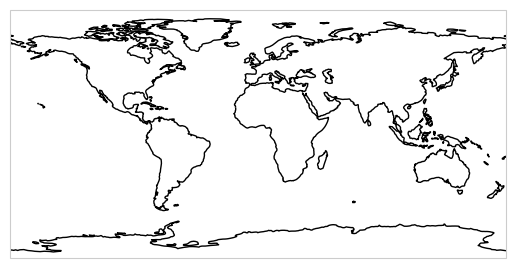

In [48]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.coastlines()

plt.show()


In [47]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 65.3 MB/s eta 0:00:00


In [50]:
import pandas as pd
import json

def prepare_pollution_data(csv_file):
    """
    Reads air pollution data, calculates average AQI per city, and
    prepares data for interactive mapping.
    """
    df = pd.read_csv(csv_file)

    # Ensure 'date' column is correctly formatted
    # The format is changed to match the date format in the CSV file.
    # errors='coerce' will handle invalid parsing by setting them to NaT.
    df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

    # Calculate average AQI per city
    city_aqi = df.groupby('city')['aqi'].mean().reset_index()

    # City coordinates (replace with a comprehensive list)
    city_coordinates = {
        'Ahmedabad': {'lat': 23.0225, 'lng': 72.5714},
        'Aizawl': {'lat': 23.7271, 'lng': 92.7176},
        'Amaravati': {'lat': 16.5062, 'lng': 80.6483},
        'Amritsar': {'lat': 31.6340, 'lng': 74.8723},
        'Bengaluru': {'lat': 12.9716, 'lng': 77.5946},
        'Bhopal': {'lat': 23.2599, 'lng': 77.4126},
        'Brajrajnagar': {'lat': 21.8167, 'lng': 83.9000},
        'Chandigarh': {'lat': 30.7333, 'lng': 76.7794},
        'Chennai': {'lat': 13.0827, 'lng': 80.2707},
        'Coimbatore': {'lat': 11.0168, 'lng': 76.9558},
        'Delhi': {'lat': 28.6139, 'lng': 77.2090},
        'Ernakulam': {'lat': 9.9816, 'lng': 76.3083},
        'Gurugram': {'lat': 28.4595, 'lng': 77.0266},
        'Guwahati': {'lat': 26.1445, 'lng': 91.7362},
        'Hyderabad': {'lat': 17.3850, 'lng': 78.4867},
        'Jaipur': {'lat': 26.9124, 'lng': 75.7873},
        'Jorapokhar': {'lat': 23.7167, 'lng': 86.1667},
        'Kochi': {'lat': 9.9312, 'lng': 76.2673},
        'Kolkata': {'lat': 22.5726, 'lng': 88.3639},
        'Lucknow': {'lat': 26.8467, 'lng': 80.9462},
        'Mumbai': {'lat': 19.0760, 'lng': 72.8777},
        'Patna': {'lat': 25.5941, 'lng': 85.1376},
        'Shillong': {'lat': 25.5789, 'lng': 91.8933},
        'Talcher': {'lat': 20.9500, 'lng': 85.2333},
        'Thiruvananthapuram': {'lat': 8.5241, 'lng': 76.9366},
        'Visakhapatnam': {'lat': 17.6868, 'lng': 83.2185}
    }

    # Merge coordinates with AQI data
    data = []
    for index, row in city_aqi.iterrows():
        city = row['city']
        if city in city_coordinates:
            data.append({
                'city': city,
                'lat': city_coordinates[city]['lat'],
                'lng': city_coordinates[city]['lng'],
                'aqi': row['aqi']
            })
    return data

#Example usage
data = prepare_pollution_data('air_pollution_data.csv')
print(data)


[{'city': 'Ahmedabad', 'lat': 23.0225, 'lng': 72.5714, 'aqi': 4.115044247787611}, {'city': 'Aizawl', 'lat': 23.7271, 'lng': 92.7176, 'aqi': 2.7831858407079646}, {'city': 'Amaravati', 'lat': 16.5062, 'lng': 80.6483, 'aqi': 3.702433628318584}, {'city': 'Amritsar', 'lat': 31.634, 'lng': 74.8723, 'aqi': 4.782079646017699}, {'city': 'Bengaluru', 'lat': 12.9716, 'lng': 77.5946, 'aqi': 2.856194690265487}, {'city': 'Bhopal', 'lat': 23.2599, 'lng': 77.4126, 'aqi': 3.9192477876106193}, {'city': 'Brajrajnagar', 'lat': 21.8167, 'lng': 83.9, 'aqi': 4.28429203539823}, {'city': 'Chandigarh', 'lat': 30.7333, 'lng': 76.7794, 'aqi': 4.3584070796460175}, {'city': 'Chennai', 'lat': 13.0827, 'lng': 80.2707, 'aqi': 3.768805309734513}, {'city': 'Coimbatore', 'lat': 11.0168, 'lng': 76.9558, 'aqi': 2.799778761061947}, {'city': 'Delhi', 'lat': 28.6139, 'lng': 77.209, 'aqi': 4.808628318584071}, {'city': 'Ernakulam', 'lat': 9.9816, 'lng': 76.3083, 'aqi': 2.8230088495575223}, {'city': 'Gurugram', 'lat': 28.4595, '

In [53]:
from flask import Flask, render_template, jsonify, request
from data_prep import prepare_pollution_data  # Import the function

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/pollution_data')
def pollution_data():
    data = prepare_pollution_data('air_pollution_data.csv')
    return jsonify(data)

@app.route('/filter_data')
def filter_data():
    city = request.args.get('city')
    data = prepare_pollution_data('air_pollution_data.csv')
    if city and city != 'All':
        filtered_data = [d for d in data if d['city'] == city]
        return jsonify(filtered_data)
    return jsonify(data)

if __name__ == '__main__':
    app.run(debug=True)


ModuleNotFoundError: No module named 'data_prep'

In [54]:
# data_prep.py

import pandas as pd
import json

def prepare_pollution_data(csv_file):
    """
    Reads air pollution data, calculates average AQI per city, and
    prepares data for interactive mapping.
    """
    df = pd.read_csv(csv_file)

    # Ensure 'date' column is correctly formatted
    # The format is changed to match the date format in the CSV file.
    # errors='coerce' will handle invalid parsing by setting them to NaT.
    df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

    # Calculate average AQI per city
    city_aqi = df.groupby('city')['aqi'].mean().reset_index()

    # City coordinates (replace with a comprehensive list)
    city_coordinates = {
        'Ahmedabad': {'lat': 23.0225, 'lng': 72.5714},
        'Aizawl': {'lat': 23.7271, 'lng': 92.7176},
        'Amaravati': {'lat': 16.5062, 'lng': 80.6483},
        'Amritsar': {'lat': 31.6340, 'lng': 74.8723},
        'Bengaluru': {'lat': 12.9716, 'lng': 77.5946},
        'Bhopal': {'lat': 23.2599, 'lng': 77.4126},
        'Brajrajnagar': {'lat': 21.8167, 'lng': 83.9000},
        'Chandigarh': {'lat': 30.7333, 'lng': 76.7794},
        'Chennai': {'lat': 13.0827, 'lng': 80.2707},
        'Coimbatore': {'lat': 11.0168, 'lng': 76.9558},
        'Delhi': {'lat': 28.6139, 'lng': 77.2090},
        'Ernakulam': {'lat': 9.9816, 'lng': 76.3083},
        'Gurugram': {'lat': 28.4595, 'lng': 77.0266},
        'Guwahati': {'lat': 26.1445, 'lng': 91.7362},
        'Hyderabad': {'lat': 17.3850, 'lng': 78.4867},
        'Jaipur': {'lat': 26.9124, 'lng': 75.7873},
        'Jorapokhar': {'lat': 23.7167, 'lng': 86.1667},
        'Kochi': {'lat': 9.9312, 'lng': 76.2673},
        'Kolkata': {'lat': 22.5726, 'lng': 88.3639},
        'Lucknow': {'lat': 26.8467, 'lng': 80.9462},
        'Mumbai': {'lat': 19.0760, 'lng': 72.8777},
        'Patna': {'lat': 25.5941, 'lng': 85.1376},
        'Shillong': {'lat': 25.5789, 'lng': 91.8933},
        'Talcher': {'lat': 20.9500, 'lng': 85.2333},
        'Thiruvananthapuram': {'lat': 8.5241, 'lng': 76.9366},
        'Visakhapatnam': {'lat': 17.6868, 'lng': 83.2185}
    }

    # Merge coordinates with AQI data
    data = []
    for index, row in city_aqi.iterrows():
        city = row['city']
        if city in city_coordinates:
            data.append({
                'city': city,
                'lat': city_coordinates[city]['lat'],
                'lng': city_coordinates[city]['lng'],
                'aqi': row['aqi']
            })
    return data

In [52]:
import pandas as pd
import json

def prepare_pollution_data(csv_file):
    """
    Reads air pollution data, calculates average AQI per city, and
    prepares data for interactive mapping.
    """
    df = pd.read_csv(csv_file)

    # Ensure 'date' column is correctly formatted
    # The format is changed to match the date format in the CSV file.
    # errors='coerce' will handle invalid parsing by setting them to NaT.
    df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

    # Calculate average AQI per city
    city_aqi = df.groupby('city')['aqi'].mean().reset_index()

    # City coordinates (replace with a comprehensive list)
    city_coordinates = {
        'Ahmedabad': {'lat': 23.0225, 'lng': 72.5714},
        'Aizawl': {'lat': 23.7271, 'lng': 92.7176},
        'Amaravati': {'lat': 16.5062, 'lng': 80.6483},
        'Amritsar': {'lat': 31.6340, 'lng': 74.8723},
        'Bengaluru': {'lat': 12.9716, 'lng': 77.5946},
        'Bhopal': {'lat': 23.2599, 'lng': 77.4126},
        'Brajrajnagar': {'lat': 21.8167, 'lng': 83.9000},
        'Chandigarh': {'lat': 30.7333, 'lng': 76.7794},
        'Chennai': {'lat': 13.0827, 'lng': 80.2707},
        'Coimbatore': {'lat': 11.0168, 'lng': 76.9558},
        'Delhi': {'lat': 28.6139, 'lng': 77.2090},
        'Ernakulam': {'lat': 9.9816, 'lng': 76.3083},
        'Gurugram': {'lat': 28.4595, 'lng': 77.0266},
        'Guwahati': {'lat': 26.1445, 'lng': 91.7362},
        'Hyderabad': {'lat': 17.3850, 'lng': 78.4867},
        'Jaipur': {'lat': 26.9124, 'lng': 75.7873},
        'Jorapokhar': {'lat': 23.7167, 'lng': 86.1667},
        'Kochi': {'lat': 9.9312, 'lng': 76.2673},
        'Kolkata': {'lat': 22.5726, 'lng': 88.3639},
        'Lucknow': {'lat': 26.8467, 'lng': 80.9462},
        'Mumbai': {'lat': 19.0760, 'lng': 72.8777},
        'Patna': {'lat': 25.5941, 'lng': 85.1376},
        'Shillong': {'lat': 25.5789, 'lng': 91.8933},
        'Talcher': {'lat': 20.9500, 'lng': 85.2333},
        'Thiruvananthapuram': {'lat': 8.5241, 'lng': 76.9366},
        'Visakhapatnam': {'lat': 17.6868, 'lng': 83.2185}
    }

    # Merge coordinates with AQI data
    data = []
    for index, row in city_aqi.iterrows():
        city = row['city']
        if city in city_coordinates:
            data.append({
                'city': city,
                'lat': city_coordinates[city]['lat'],
                'lng': city_coordinates[city]['lng'],
                'aqi': row['aqi']
            })
    return data

In [55]:
from flask import Flask, render_template, jsonify, request
from data_prep import prepare_pollution_data  # Import the function

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/pollution_data')
def pollution_data():
    data = prepare_pollution_data('air_pollution_data.csv')
    return jsonify(data)

@app.route('/filter_data')
def filter_data():
    city = request.args.get('city')
    data = prepare_pollution_data('air_pollution_data.csv')
    if city and city != 'All':
        filtered_data = [d for d in data if d['city'] == city]
        return jsonify(filtered_data)
    return jsonify(data)

if __name__ == '__main__':
    app.run(debug=True)


ModuleNotFoundError: No module named 'data_prep'

In [56]:
# data_prep.py
import pandas as pd
import json

def prepare_pollution_data(csv_file):
    """
    Reads air pollution data, calculates average AQI per city, and
    prepares data for interactive mapping.
    """
    df = pd.read_csv(csv_file)

    # Ensure 'date' column is correctly formatted
    # The format is changed to match the date format in the CSV file.
    # errors='coerce' will handle invalid parsing by setting them to NaT.
    df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

    # Calculate average AQI per city
    city_aqi = df.groupby('city')['aqi'].mean().reset_index()

    # City coordinates (replace with a comprehensive list)
    city_coordinates = {
        'Ahmedabad': {'lat': 23.0225, 'lng': 72.5714},
        'Aizawl': {'lat': 23.7271, 'lng': 92.7176},
        'Amaravati': {'lat': 16.5062, 'lng': 80.6483},
        'Amritsar': {'lat': 31.6340, 'lng': 74.8723},
        'Bengaluru': {'lat': 12.9716, 'lng': 77.5946},
        'Bhopal': {'lat': 23.2599, 'lng': 77.4126},
        'Brajrajnagar': {'lat': 21.8167, 'lng': 83.9000},
        'Chandigarh': {'lat': 30.7333, 'lng': 76.7794},
        'Chennai': {'lat': 13.0827, 'lng': 80.2707},
        'Coimbatore': {'lat': 11.0168, 'lng': 76.9558},
        'Delhi': {'lat': 28.6139, 'lng': 77.2090},
        'Ernakulam': {'lat': 9.9816, 'lng': 76.3083},
        'Gurugram': {'lat': 28.4595, 'lng': 77.0266},
        'Guwahati': {'lat': 26.1445, 'lng': 91.7362},
        'Hyderabad': {'lat': 17.3850, 'lng': 78.4867},
        'Jaipur': {'lat': 26.9124, 'lng': 75.7873},
        'Jorapokhar': {'lat': 23.7167, 'lng': 86.1667},
        'Kochi': {'lat': 9.9312, 'lng': 76.2673},
        'Kolkata': {'lat': 22.5726, 'lng': 88.3639},
        'Lucknow': {'lat': 26.8467, 'lng': 80.9462},
        'Mumbai': {'lat': 19.0760, 'lng': 72.8777},
        'Patna': {'lat': 25.5941, 'lng': 85.1376},
        'Shillong': {'lat': 25.5789, 'lng': 91.8933},
        'Talcher': {'lat': 20.9500, 'lng': 85.2333},
        'Thiruvananthapuram': {'lat': 8.5241, 'lng': 76.9366},
        'Visakhapatnam': {'lat': 17.6868, 'lng': 83.2185}
    }

    # Merge coordinates with AQI data
    data = []
    for index, row in city_aqi.iterrows():
        city = row['city']
        if city in city_coordinates:
            data.append({
                'city': city,
                'lat': city_coordinates[city]['lat'],
                'lng': city_coordinates[city]['lng'],
                'aqi': row['aqi']
            })
    return data

In [58]:
from flask import Flask, render_template, jsonify, request
# from data_prep import prepare_pollution_data  # Import the function

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/pollution_data')
def pollution_data():
    data = prepare_pollution_data('air_pollution_data.csv')
    return jsonify(data)

@app.route('/filter_data')
def filter_data():
    city = request.args.get('city')
    data = prepare_pollution_data('air_pollution_data.csv')
    if city and city != 'All':
        filtered_data = [d for d in data if d['city'] == city]
        return jsonify(filtered_data)
    return jsonify(data)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [60]:
import folium
import pandas as pd
from folium.plugins import HeatMap

# Sample AQI data (replace with your actual data)
data = {
    'city': ['Delhi', 'Mumbai', 'Kolkata'],
    'latitude': [28.6139, 19.0760, 22.5726],
    'longitude': [77.2090, 72.8777, 88.3639],
    'aqi': [150, 80, 220]
}
df = pd.DataFrame(data)

# Create a Folium map centered on India
india_map = folium.Map(location=[21, 78], zoom_start=5)

# Function to determine marker color based on AQI
def get_color(aqi):
    if aqi <= 50:
        return 'green'
    elif aqi <= 100:
        return 'yellow'
    elif aqi <= 150:
        return 'orange'
    elif aqi <= 200:
        return 'red'
    else:
        return 'purple'

# Add markers to the map
for index, row in df.iterrows():
    city = row['city']
    lat = row['latitude']
    lon = row['longitude']
    aqi = row['aqi']
    color = get_color(aqi)

    folium.Marker(
        location=[lat, lon],
        popup=f"{city}: AQI = {aqi}",
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(india_map)

#Adding heatmap layer
heat_data = [[row['latitude'], row['longitude'], row['aqi']] for index, row in df.iterrows()]

HeatMap(heat_data).add_to(folium.FeatureGroup(name='AQI Heatmap').add_to(india_map))

folium.LayerControl().add_to(india_map)

# Save the map as an HTML file
india_map.save("india_aqi_map.html")


<ipython-input-60-9ab9ec3d2f32>:41: UserWarning: color argument of Icon should be one of: {'lightred', 'purple', 'lightblue', 'black', 'darkgreen', 'lightgreen', 'gray', 'darkred', 'pink', 'green', 'darkblue', 'beige', 'cadetblue', 'orange', 'blue', 'darkpurple', 'lightgray', 'red', 'white'}.
  icon=folium.Icon(color=color, icon='info-sign')


In [61]:
pip install folium requests


In [63]:
import folium
from folium.plugins import Realtime
from folium import JsCode

# Create a base map centered on India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# JavaScript function to fetch real-time AQI data
source = JsCode("""
function(responseHandler, errorHandler) {
    var url = 'https://api.ambeedata.com/latest/airquality/by-city'; // Replace with your API endpoint
    var headers = {
        'x-api-key': 'YOUR_API_KEY' // Replace with your actual API key
    };

    fetch(url, {headers: headers})
        .then(response => response.json())
        .then(data => {
            var features = [];
            data.data.forEach(function(city) {
                features.push({
                    type: 'Feature',
                    geometry: {
                        type: 'Point',
                        coordinates: [city.longitude, city.latitude]
                    },
                    properties: {
                        city: city.city,
                        aqi: city.AQI,
                        color: city.AQI <= 50 ? 'green' : city.AQI <= 100 ? 'yellow' : city.AQI <= 150 ? 'orange' : 'red'
                    }
                });
            });
            responseHandler({
                type: 'FeatureCollection',
                features: features
            });
        })
        .catch(errorHandler);
}
""")

# Create a Realtime layer
rt = Realtime(
    source,
    interval=10000,  # Update every 10 seconds
    point_to_layer=JsCode("""
        function(feature, latlng) {
            return L.circleMarker(latlng, {
                radius: Math.sqrt(feature.properties.aqi) * 2, // Scale size based on AQI
                fillColor: feature.properties.color,
                color: feature.properties.color,
                fillOpacity: 0.5
            });
        }
    """)
)

# Add the real-time layer to the map
rt.add_to(m)

# Save the map as an HTML file
m.save("india_aqi_realtime_map.html")


In [68]:
import pandas as pd
import folium
from folium.plugins import HeatMap

In [71]:
# Load the data
data = pd.read_csv('air_pollution_data.csv')

# Convert 'date' column to datetime objects
# Use the correct format string '%d-%m-%Y' for 'dd-mm-yyyy' format
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y', errors='coerce')
# errors='coerce' will set invalid dates to NaT (Not a Time) which you can handle later



# Calculate average AQI per city
city_aqi = data.groupby('city')['aqi'].mean().reset_index()

# City coordinates dictionary
city_coordinates = {
    'Ahmedabad': {'lat': 23.0225, 'lng': 72.5714},
    'Aizawl': {'lat': 23.7271, 'lng': 92.7176},
    'Amaravati': {'lat': 16.5062, 'lng': 80.6483},
    'Amritsar': {'lat': 31.6340, 'lng': 74.8723},
    'Bengaluru': {'lat': 12.9716, 'lng': 77.5946},
    'Bhopal': {'lat': 23.2599, 'lng': 77.4126},
    'Brajrajnagar': {'lat': 21.8167, 'lng': 83.9000},
    'Chandigarh': {'lat': 30.7333, 'lng': 76.7794},
    'Chennai': {'lat': 13.0827, 'lng': 80.2707},
    'Coimbatore': {'lat': 11.0168, 'lng': 76.9558},
    'Delhi': {'lat': 28.6139, 'lng': 77.2090},
    'Ernakulam': {'lat': 9.9816, 'lng': 76.3083},
    'Gurugram': {'lat': 28.4595, 'lng': 77.0266},
    'Guwahati': {'lat': 26.1445, 'lng': 91.7362},
    'Hyderabad': {'lat': 17.3850, 'lng': 78.4867},
    'Jaipur': {'lat': 26.9124, 'lng': 75.7873},
    'Jorapokhar': {'lat': 23.7167, 'lng': 86.1667},
    'Kochi': {'lat': 9.9312, 'lng': 76.2673},
    'Kolkata': {'lat': 22.5726, 'lng': 88.3639},
    'Lucknow': {'lat': 26.8467, 'lng': 80.9462},
    'Mumbai': {'lat': 19.0760, 'lng': 72.8777},
    'Patna': {'lat': 25.5941, 'lng': 85.1376},
    'Shillong': {'lat': 25.5789, 'lng': 91.8933},
    'Talcher': {'lat': 20.9500, 'lng': 85.2333},
    'Thiruvananthapuram': {'lat': 8.5241, 'lng': 76.9366},
    'Visakhapatnam': {'lat': 17.6868, 'lng': 83.2185}
}

# Add latitude and longitude to city_aqi DataFrame
city_aqi['lat'] = city_aqi['city'].map(lambda city: city_coordinates[city]['lat'] if city in city_coordinates else None)
city_aqi['lng'] = city_aqi['city'].map(lambda city: city_coordinates[city]['lng'] if city in city_coordinates else None)

# Drop rows where lat or lng is None (city not found in coordinates)
city_aqi = city_aqi.dropna(subset=['lat', 'lng'])

# Create a Folium map centered on India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Define a color scale based on AQI values
def get_color(aqi):
    if aqi <= 50:
        return 'green'
    elif 50 < aqi <= 100:
        return 'yellow'
    elif 100 < aqi <= 150:
        return 'orange'
    elif 150 < aqi <= 200:
        return 'red'
    else:
        return 'purple'

# Add circle markers to the map, with size and color based on AQI
for index, row in city_aqi.iterrows():
    city = row['city']
    aqi = row['aqi']
    lat = row['lat']
    lng = row['lng']
    color = get_color(aqi)
    radius = aqi / 5  # Adjust the scaling factor as needed

    folium.CircleMarker(
        location=[lat, lng],
        radius=radius,
        popup=f"{city}: AQI = {aqi:.2f}",
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(india_map)

# Adding heatmap layer
heat_data = [[row['lat'], row['lng'], row['aqi']] for index, row in city_aqi.iterrows()]
HeatMap(heat_data).add_to(folium.FeatureGroup(name='AQI Heatmap').add_to(india_map))

folium.LayerControl().add_to(india_map)

# Save the map to an HTML file
india_map.save("india_aqi_bubble_map.html")


In [72]:
fig=px.scatter_mapbox(df.loc[df['api']<city],lat='lat',lon='long',color='sqft_living',size='api')


NameError: name 'px' is not defined